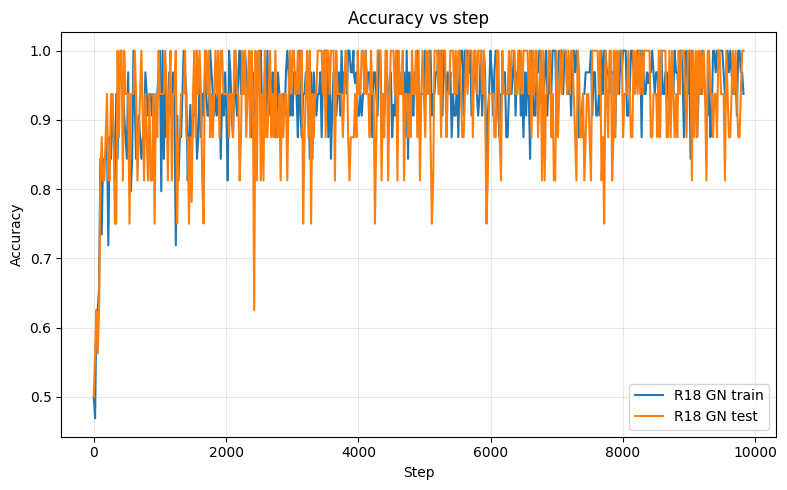

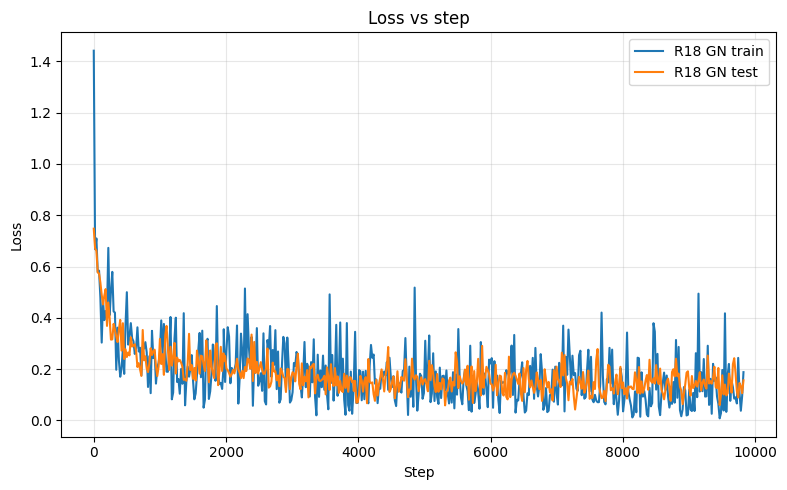

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/home/hep/an1522/dark_tridents_wspace/outputs/training_metrics"

FILES = {
    "DM-CNN (GN)": "DM-CNN_training_metrics_20260116-06_13_PM_0.001_AG_GN_LM_TRAINING.csv",
    "R18 BN": "resnet18_bn_training_metrics_20260123-01_45_AM.csv",
    "R18 GN": "resnet18_gn_training_metrics_20260122-08_26_PM.csv",
    "R34 BN": "resnet34_bn_training_metrics_20260123-01_46_AM.csv",
    "R34 GN": "resnet34_gn_training_metrics_20260122-08_28_PM.csv",
}

name = "R18 GN"
csv_file = FILES[name]
csv_path = os.path.join(BASE, csv_file)
df = pd.read_csv(csv_path)
out_dir = BASE
tag = name.lower().replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "")

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(df["step"], df["train_accu"], label= name + " train")
plt.plot(df["step"], df["test_accu"], label= name + " test")
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title("Accuracy vs step")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

acc_png  = os.path.join(out_dir, f"accuracy_vs_step_{tag}.png")
# plt.savefig(acc_png, dpi=200)
plt.close()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(df["step"], df["train_loss"], label= name + " train")
plt.plot(df["step"], df["test_loss"], label= name + " test")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss vs step")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

loss_png = os.path.join(out_dir, f"loss_vs_step_{tag}.png")
# plt.savefig(loss_png, dpi=200)
plt.close()


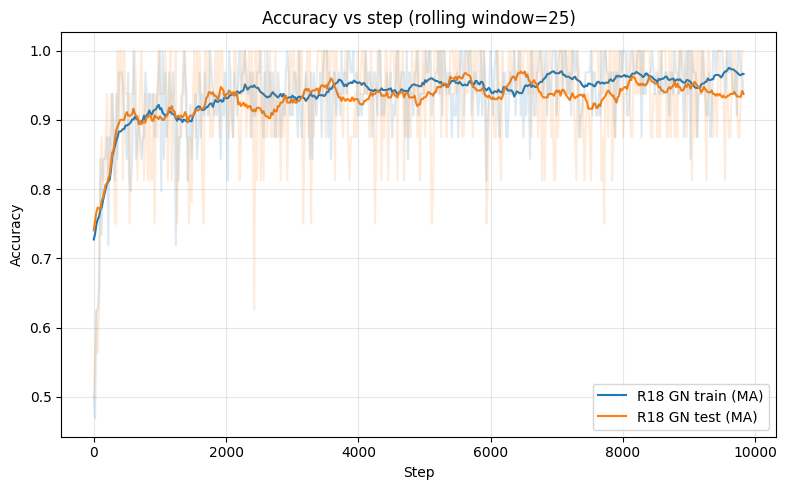

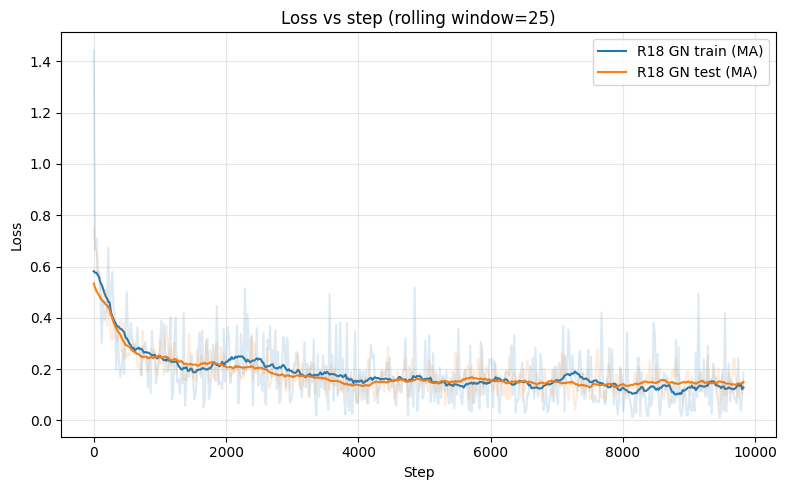

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/home/hep/an1522/dark_tridents_wspace/outputs/training_metrics"

FILES = {
    "DM-CNN (GN)": "DM-CNN_training_metrics_20260116-06_13_PM_0.001_AG_GN_LM_TRAINING.csv",
    "R18 BN":      "resnet18_bn_training_metrics_20260123-01_45_AM.csv",
    "R18 GN":      "resnet18_gn_training_metrics_20260122-08_26_PM.csv",
    "R34 BN":      "resnet34_bn_training_metrics_20260123-01_46_AM.csv",
    "R34 GN":      "resnet34_gn_training_metrics_20260122-08_28_PM.csv",
}

# Moving average window (in number of points)
WINDOW = 25
MINP = max(3, WINDOW // 5)

name = "R18 GN"
csv_file = FILES[name]
csv_path = os.path.join(BASE, csv_file)
df = pd.read_csv(csv_path)
out_dir = BASE
tag = name.lower().replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "")

# Ensure numeric + sorted by step
df["step"] = pd.to_numeric(df["step"], errors="coerce")
df = df.dropna(subset=["step"]).sort_values("step")

for col in ["train_accu", "test_accu", "train_loss", "test_loss"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col + "_ma"] = df[col].rolling(window=WINDOW, min_periods=MINP, center=True).mean()

# Accuracy plot
plt.figure(figsize=(8, 5))

# smoothed (moving average)
(line1,) = plt.plot(df["step"], df["train_accu_ma"], label=name + " train (MA)")
c1 = line1.get_color()
(line2,) = plt.plot(df["step"], df["test_accu_ma"], label=name + " test (MA)")
c2 = line2.get_color()

# raw (faint, same colors)
plt.plot(df["step"], df["train_accu"], color=c1, alpha=0.15)
plt.plot(df["step"], df["test_accu"], color=c2, alpha=0.15)

plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs step (rolling window={WINDOW})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

acc_png  = os.path.join(out_dir, f"accuracy_vs_step_{tag}.png")
# plt.savefig(acc_png, dpi=200)
plt.close()

# Loss plot
plt.figure(figsize=(8, 5))

# smoothed (moving average)
(line3,) = plt.plot(df["step"], df["train_loss_ma"], label=name + " train (MA)")
c3 = line3.get_color()
(line4,) = plt.plot(df["step"], df["test_loss_ma"], label=name + " test (MA)")
c4 = line4.get_color()

# raw (faint, same colors)
plt.plot(df["step"], df["train_loss"], color=c3, alpha=0.15)
plt.plot(df["step"], df["test_loss"], color=c4, alpha=0.15)

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title(f"Loss vs step (rolling window={WINDOW})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

loss_png = os.path.join(out_dir, f"loss_vs_step_{tag}.png")
# plt.savefig(loss_png, dpi=200)
plt.close()


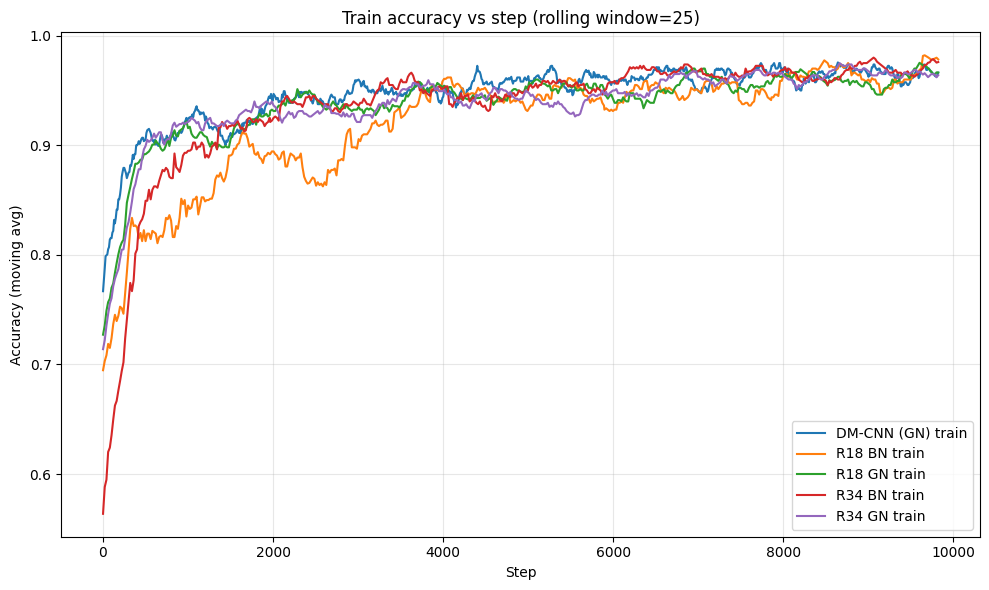

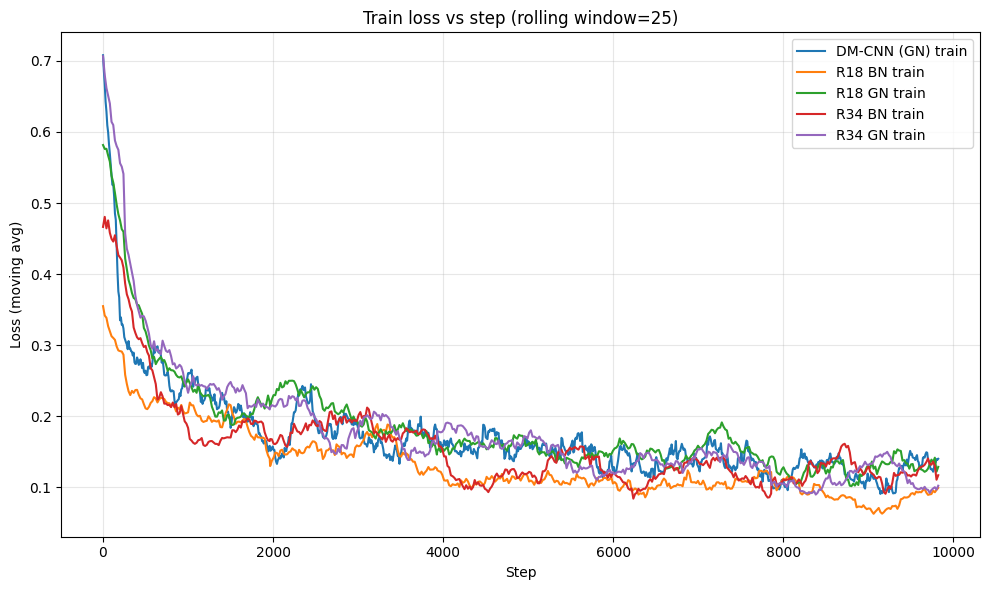

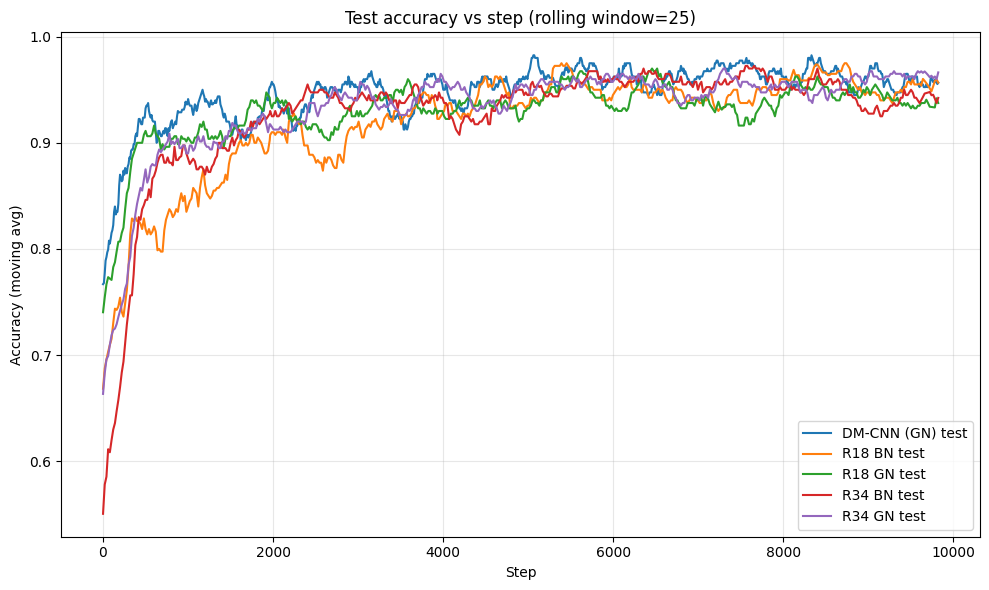

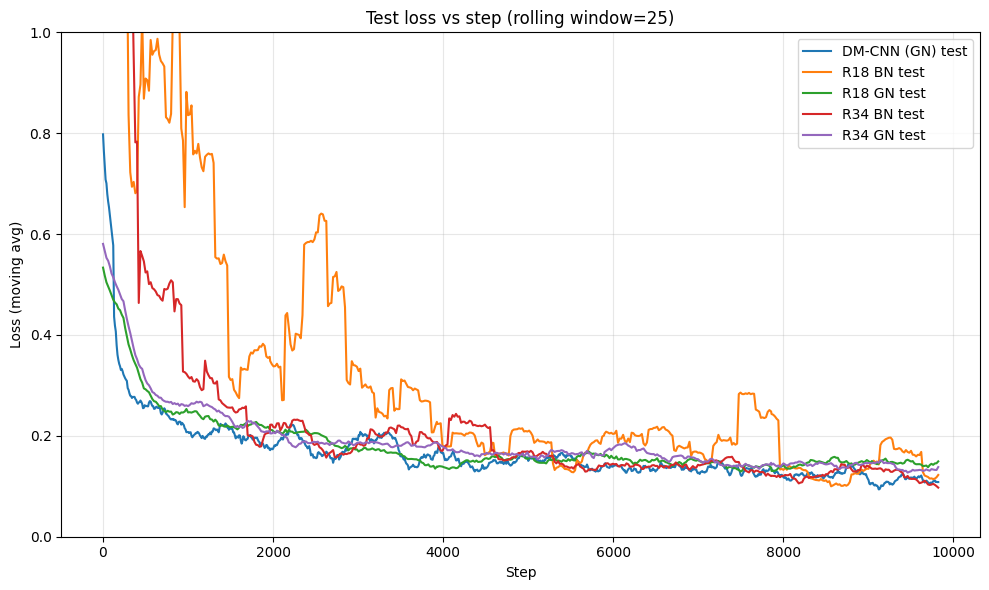

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/home/hep/an1522/dark_tridents_wspace/outputs/training_metrics"

FILES = {
    "DM-CNN (GN)": "DM-CNN_training_metrics_20260116-06_13_PM_0.001_AG_GN_LM_TRAINING.csv",
    "R18 BN":      "resnet18_bn_training_metrics_20260123-01_45_AM.csv",
    "R18 GN":      "resnet18_gn_training_metrics_20260122-08_26_PM.csv",
    "R34 BN":      "resnet34_bn_training_metrics_20260123-01_46_AM.csv",
    "R34 GN":      "resnet34_gn_training_metrics_20260122-08_28_PM.csv",
}

# # rolling window in "points" (not steps). Adjust if you want smoother/less smooth.
# WINDOW = 25
# MINP = max(3, WINDOW // 5)

def load_metrics(path):
    df = pd.read_csv(path)

    # Ensure numeric + sorted by step
    df["step"] = pd.to_numeric(df["step"], errors="coerce")
    df = df.dropna(subset=["step"]).sort_values("step")

    for col in ["train_accu","test_accu","train_loss","test_loss"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Moving averages (centered looks nicer for comparison)
    for col in ["train_accu","test_accu","train_loss","test_loss"]:
        df[col + "_ma"] = df[col].rolling(window=WINDOW, min_periods=MINP, center=True).mean()

    return df

runs = {name: load_metrics(os.path.join(BASE, fn)) for name, fn in FILES.items()}

# --------- Train accuracy (smoothed) ----------
plt.figure(figsize=(10,6))
for name, df in runs.items():
    plt.plot(df["step"], df["train_accu_ma"], label=f"{name} train")
    # plt.plot(df["step"], df["test_accu"], alpha=0.15)
plt.xlabel("Step")
plt.ylabel("Accuracy (moving avg)")
plt.title(f"Train accuracy vs step (rolling window={WINDOW})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --------- Train loss (smoothed) ----------
plt.figure(figsize=(10,6))
for name, df in runs.items():
    plt.plot(df["step"], df["train_loss_ma"], label=f"{name} train")
    # plt.plot(df["step"], df["test_loss"], alpha=0.15)
plt.xlabel("Step")
plt.ylabel("Loss (moving avg)")
plt.title(f"Train loss vs step (rolling window={WINDOW})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --------- Test accuracy (smoothed) ----------
plt.figure(figsize=(10,6))
for name, df in runs.items():
    plt.plot(df["step"], df["test_accu_ma"], label=f"{name} test")
    # plt.plot(df["step"], df["test_accu"], alpha=0.15)
plt.xlabel("Step")
plt.ylabel("Accuracy (moving avg)")
plt.title(f"Test accuracy vs step (rolling window={WINDOW})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --------- Test loss (smoothed) ----------
plt.figure(figsize=(10,6))
for name, df in runs.items():
    plt.plot(df["step"], df["test_loss_ma"], label=f"{name} test")
    # plt.plot(df["step"], df["test_loss"], alpha=0.15)
plt.xlabel("Step")
plt.ylabel("Loss (moving avg)")
plt.title(f"Test loss vs step (rolling window={WINDOW})")
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0,1)
plt.tight_layout()
plt.show()


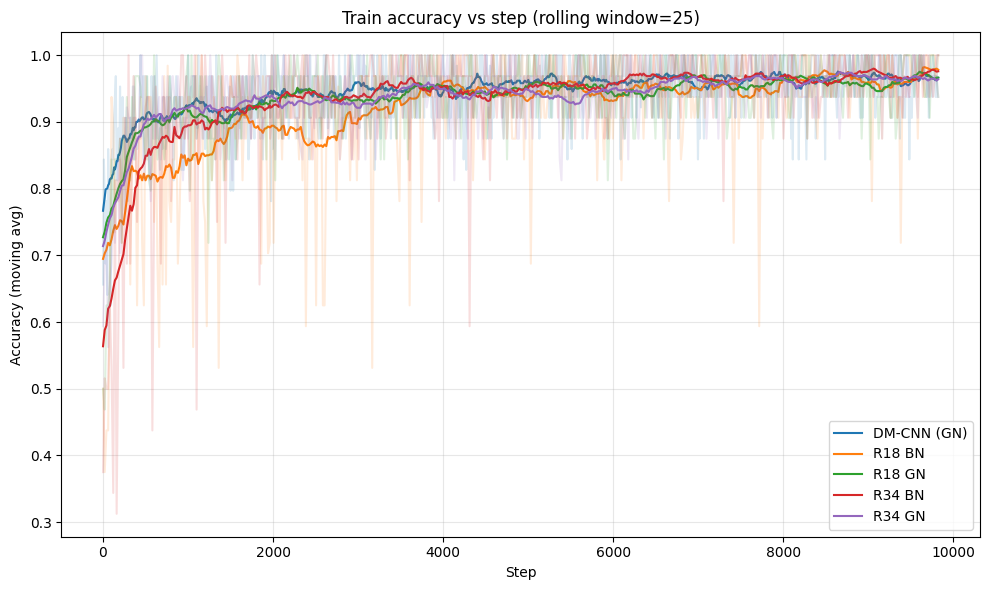

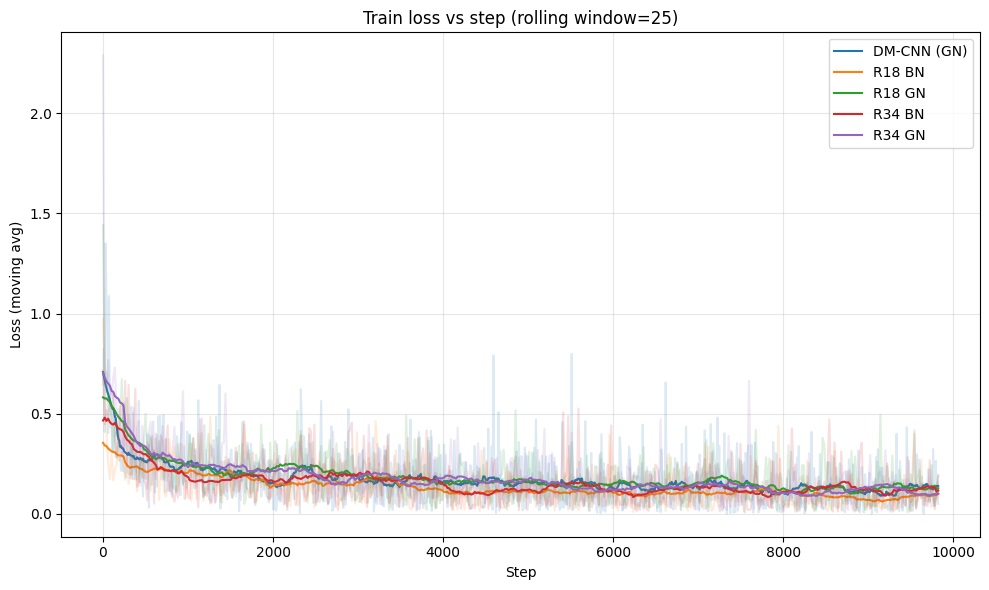

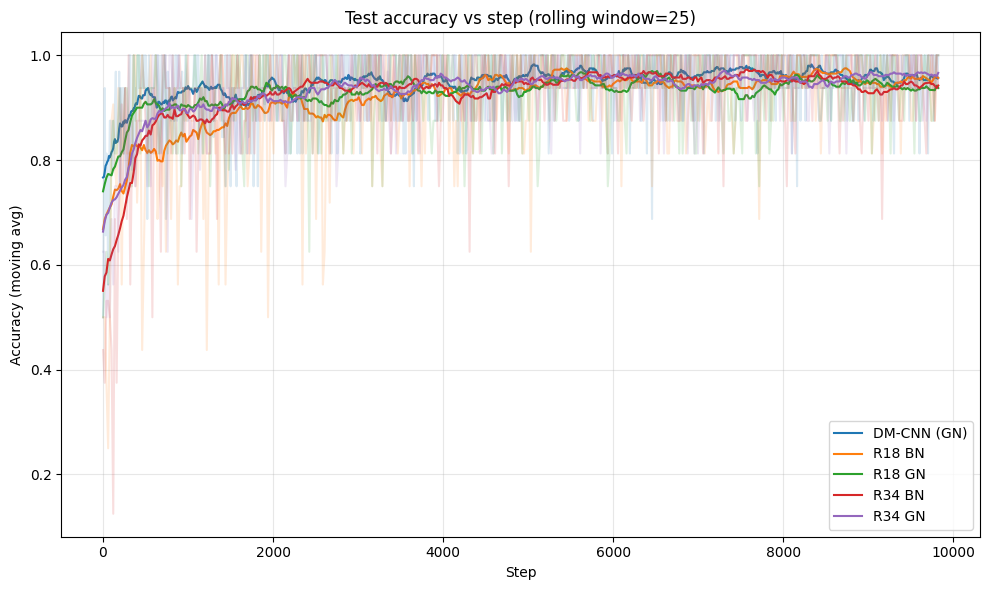

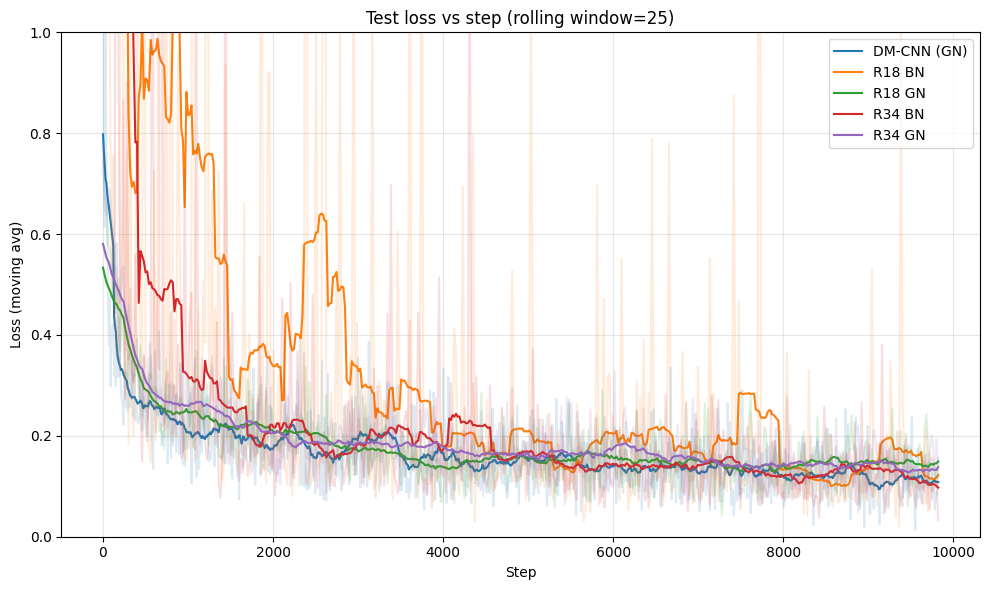

In [4]:
import os

SAVE_DIR = "/home/hep/an1522/dark_tridents_wspace/outputs/training_metrics/accuracy_loss_plots"
os.makedirs(SAVE_DIR, exist_ok=True)

def plot_metric(runs, y_ma, y_raw, title, ylabel, filename, ylim=None, save_dir=SAVE_DIR):
    plt.figure(figsize=(10, 6))
    for name, df in runs.items():
        (line,) = plt.plot(df["step"], df[y_ma], label=name)
        c = line.get_color()
        plt.plot(df["step"], df[y_raw], color=c, alpha=0.15)

    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, alpha=0.3)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.legend()
    plt.tight_layout()

    outpath = os.path.join(save_dir, filename)
    plt.savefig(outpath, dpi=200, bbox_inches="tight")  # saves PNG
    plt.show()
    plt.close()

# ---- calls
plot_metric(
    runs,
    y_ma="train_accu_ma", y_raw="train_accu",
    title=f"Train accuracy vs step (rolling window={WINDOW})",
    ylabel="Accuracy (moving avg)",
    filename="train_accuracy.png"
)

plot_metric(
    runs,
    y_ma="train_loss_ma", y_raw="train_loss",
    title=f"Train loss vs step (rolling window={WINDOW})",
    ylabel="Loss (moving avg)",
    filename="train_loss.png"
)

plot_metric(
    runs,
    y_ma="test_accu_ma", y_raw="test_accu",
    title=f"Test accuracy vs step (rolling window={WINDOW})",
    ylabel="Accuracy (moving avg)",
    filename="test_accuracy.png"
)

plot_metric(
    runs,
    y_ma="test_loss_ma", y_raw="test_loss",
    title=f"Test loss vs step (rolling window={WINDOW})",
    ylabel="Loss (moving avg)",
    filename="test_loss.png",
    ylim=(0, 1)
)
